# 1.5.2 ANN
## This script contains the following points:
### 01. Importing Libraries and Data
### 02. Preparing Data
### 03. Running ANN

### 01. Importing Libraries and Data

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [5]:
# Creating path variable
path = r'/home/cwidner/Documents/CareerFoundry/MachineLearning/Achievement1/02 Data'

In [7]:
# Reading in pleasant weather and scaled dataset
df_pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df_weather = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [9]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


### 02. Preparing Data

In [14]:
# Reducing scaled data to just temperature variables and dropping Gdansk, Roma, and Tours weather stations
df = df_weather[['DATE','MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',
               'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
               'BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max',
               'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
               'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
               'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
               'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
               'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
               'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
               'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
               'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
               'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
               'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
               'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
               'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']]
df

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,6.5,0.8,10.9,3.7,-0.9,7.9,2.4,-0.4,...,5.9,-5.9,-8.5,-3.2,4.2,2.2,4.9,8.5,6.0,10.9
1,19600102,1,6.1,3.3,10.1,2.9,2.2,4.4,2.3,1.4,...,4.9,-9.5,-10.5,-8.5,4.0,3.0,5.0,8.9,5.6,12.1
2,19600103,1,8.5,5.1,9.9,3.1,-0.5,6.4,2.7,1.7,...,3.1,-9.5,-10.0,-8.9,2.4,1.3,4.1,10.5,8.1,12.9
3,19600104,1,6.3,3.8,10.6,2.0,-2.0,3.0,2.0,0.4,...,4.9,-11.5,-12.9,-10.0,1.2,0.4,2.3,7.4,7.3,10.6
4,19600105,1,3.0,-0.7,6.0,2.0,0.7,2.8,2.5,1.1,...,4.9,-9.3,-12.0,-6.5,3.3,0.8,4.3,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,11.4,21.4,18.2,12.1,24.4,11.7,7.9,...,12.0,0.6,-1.4,2.6,11.5,8.2,14.2,10.7,7.9,13.5
22946,20221028,10,16.7,14.3,21.9,15.9,10.6,21.2,11.7,7.9,...,11.7,2.3,0.6,4.0,12.5,11.0,14.3,10.7,7.9,13.5
22947,20221029,10,16.7,13.1,22.4,13.4,8.6,18.2,11.7,7.9,...,14.2,3.3,2.1,4.5,13.1,12.1,14.4,10.7,7.9,13.5
22948,20221030,10,15.4,11.6,21.1,15.0,9.1,20.9,11.7,7.9,...,8.1,3.4,2.7,4.1,7.5,5.1,12.4,10.7,7.9,13.5


In [16]:
# Dropping unneeded columns
X = df.drop(['DATE','MONTH'], axis=1)
y = df_pleasant.drop(['DATE'], axis = 1)

In [18]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [20]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


### 03. Running ANN

In [25]:
#Scaling data
scaler = StandardScaler()

# Fitting training data
scaler.fit(X_train)

# Scaling X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


In [27]:
# Creating ANN with 2 hidden layers with 5 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=500, tol=0.001)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.001)

In [33]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4488147803857774
0.44928546531892644


In [37]:
from sklearn.metrics import classification_report

report = classification_report(y_pred, y_train)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      4487
           1       0.78      0.77      0.78      6119
           2       0.80      0.75      0.78      5998
           3       0.73      0.74      0.73      3296
           4       0.72      0.74      0.73      3605
           5       0.68      0.68      0.68      3765
           6       0.59      0.69      0.63      2432
           7       0.78      0.74      0.76      5100
           8       0.76      0.75      0.75      3625
           9       0.88      0.87      0.88      7830
          10       0.69      0.70      0.70      3560
          11       0.65      0.69      0.67      2556
          12       0.00      0.00      0.00         0
          13       0.75      0.70      0.72      3142
          14       0.00      0.00      0.00         0

   micro avg       0.74      0.75      0.75     55515
   macro avg       0.64      0.64      0.64     55515
weighted avg       0.76   

/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidn

In [39]:
report = classification_report(y_pred_test, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1470
           1       0.78      0.76      0.77      2006
           2       0.80      0.75      0.77      1970
           3       0.73      0.75      0.74      1070
           4       0.69      0.72      0.71      1185
           5       0.70      0.64      0.67      1267
           6       0.58      0.68      0.62       787
           7       0.79      0.71      0.75      1715
           8       0.74      0.73      0.74      1193
           9       0.88      0.87      0.87      2573
          10       0.71      0.72      0.71      1166
          11       0.66      0.70      0.68       807
          12       0.00      0.00      0.00         0
          13       0.71      0.69      0.70       997
          14       0.00      0.00      0.00         0

   micro avg       0.74      0.74      0.74     18206
   macro avg       0.63      0.63      0.63     18206
weighted avg       0.75   

/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidn

In [20]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


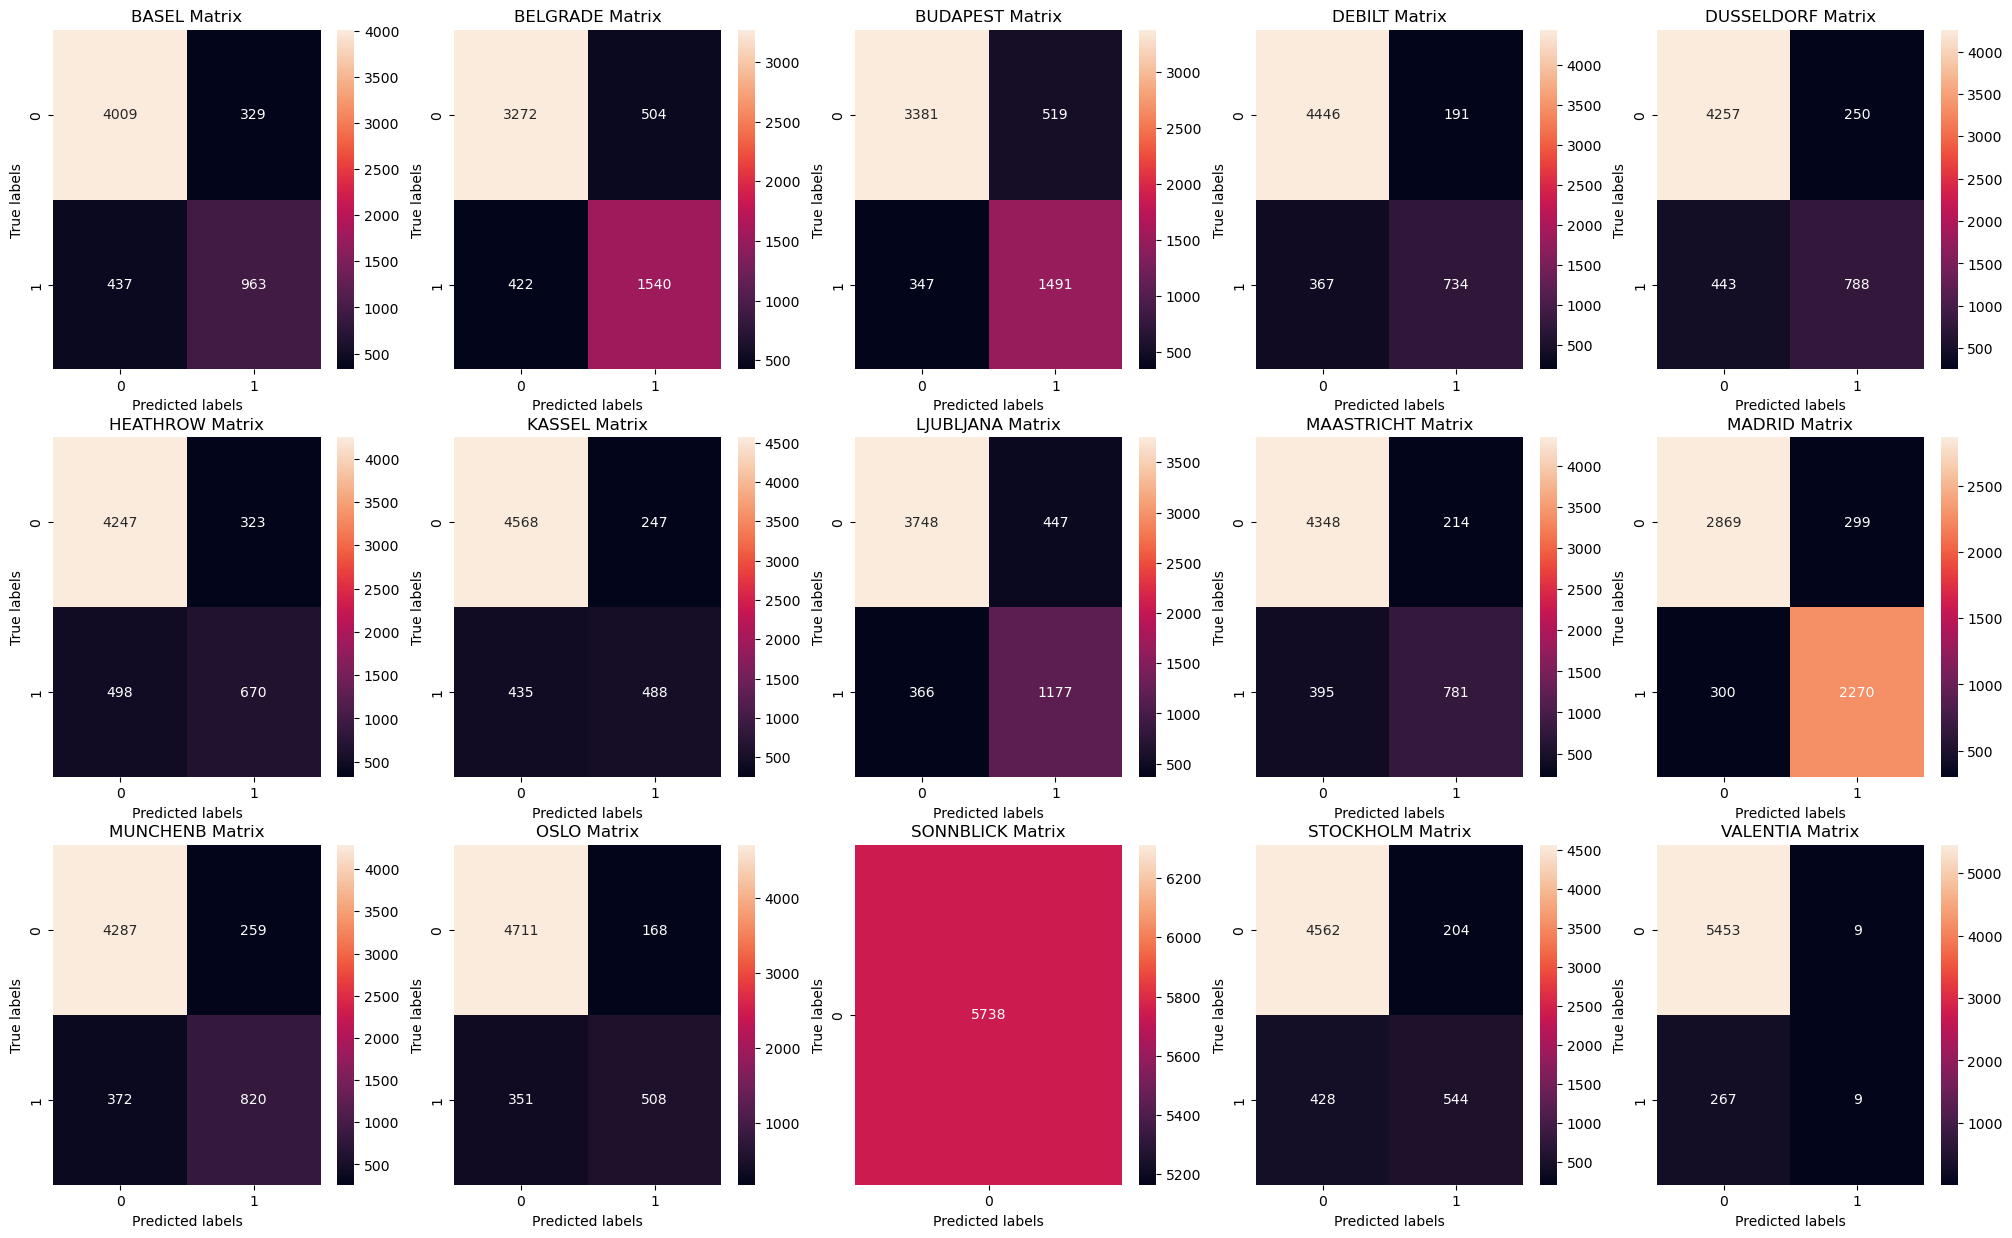

In [21]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [41]:
# Creating ANN with 3 hidden layers with 70, 60, and 60 nodes repectively
mlp = MLPClassifier(hidden_layer_sizes=(70,60,60), max_iter=1000, tol=0.0001)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70, 60, 60), max_iter=1000)

In [43]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.542644666511736
0.4900662251655629


In [45]:
report = classification_report(y_pred, y_train)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3959
           1       0.91      0.82      0.86      6714
           2       0.88      0.84      0.86      5845
           3       0.72      0.87      0.79      2779
           4       0.80      0.81      0.81      3673
           5       0.82      0.77      0.80      4031
           6       0.83      0.80      0.82      2957
           7       0.85      0.85      0.85      4838
           8       0.78      0.86      0.82      3257
           9       0.98      0.87      0.92      8607
          10       0.79      0.82      0.81      3460
          11       0.81      0.79      0.80      2819
          12       0.00      0.00      0.00         0
          13       0.84      0.79      0.81      3103
          14       0.78      0.69      0.73      1005

   micro avg       0.85      0.83      0.84     57047
   macro avg       0.77      0.76      0.77     57047
weighted avg       0.85   

/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidn

In [47]:
report = classification_report(y_pred_test, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1264
           1       0.88      0.78      0.83      2193
           2       0.84      0.82      0.83      1888
           3       0.67      0.85      0.75       869
           4       0.73      0.76      0.75      1186
           5       0.79      0.72      0.75      1284
           6       0.77      0.77      0.77       926
           7       0.80      0.80      0.80      1554
           8       0.72      0.82      0.76      1030
           9       0.97      0.86      0.91      2890
          10       0.76      0.79      0.77      1138
          11       0.79      0.73      0.76       925
          12       0.00      0.00      0.00         0
          13       0.77      0.75      0.76      1001
          14       0.70      0.60      0.65       324

   micro avg       0.80      0.79      0.80     18472
   macro avg       0.73      0.72      0.72     18472
weighted avg       0.81   

/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidn

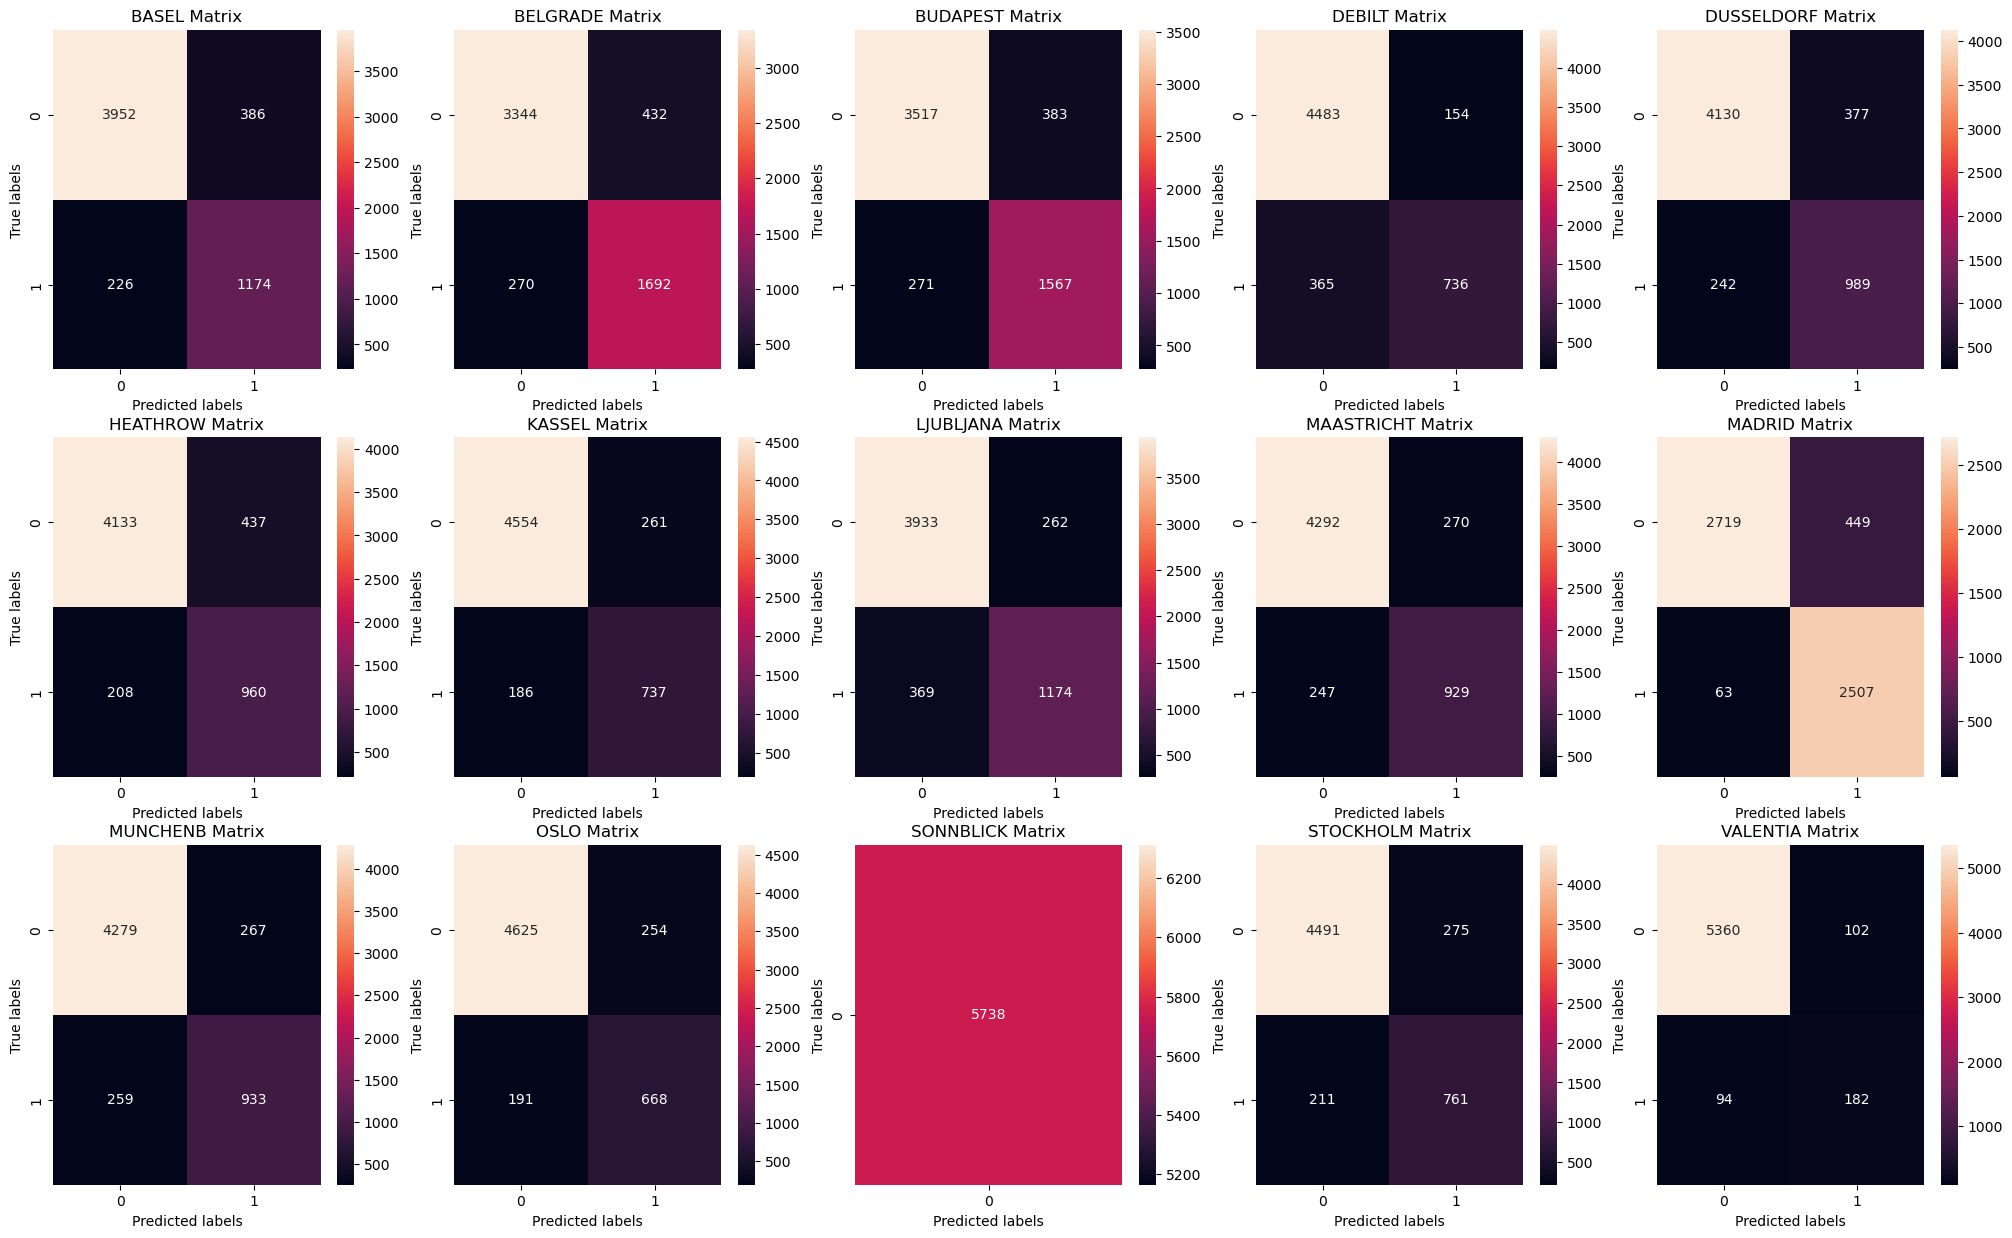

In [24]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [49]:
# Creating ANN with 3 hidden layers with 70, 60, and 60 nodes repectively
mlp = MLPClassifier(hidden_layer_sizes=(70,60,60), max_iter=1000, tol=0.0003)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70, 60, 60), max_iter=1000, tol=0.0003)

In [50]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5287009063444109
0.48292087835482744


In [53]:
report = classification_report(y_pred, y_train)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      4393
           1       0.94      0.77      0.85      7361
           2       0.93      0.80      0.86      6477
           3       0.74      0.84      0.79      2973
           4       0.81      0.81      0.81      3726
           5       0.79      0.79      0.79      3773
           6       0.76      0.84      0.80      2561
           7       0.87      0.83      0.85      5058
           8       0.81      0.84      0.82      3448
           9       0.99      0.86      0.92      8856
          10       0.81      0.81      0.81      3608
          11       0.94      0.68      0.79      3759
          12       0.00      0.00      0.00         0
          13       0.92      0.71      0.80      3795
          14       0.78      0.63      0.69      1109

   micro avg       0.87      0.80      0.83     60897
   macro avg       0.80      0.73      0.76     60897
weighted avg       0.88   

/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidn

In [55]:
report = classification_report(y_pred_test, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1445
           1       0.91      0.74      0.82      2431
           2       0.89      0.77      0.82      2128
           3       0.70      0.80      0.75       969
           4       0.75      0.74      0.74      1236
           5       0.73      0.72      0.73      1190
           6       0.71      0.79      0.75       823
           7       0.83      0.77      0.80      1650
           8       0.76      0.77      0.76      1158
           9       0.97      0.84      0.90      2972
          10       0.75      0.76      0.76      1181
          11       0.90      0.64      0.75      1204
          12       0.00      0.00      0.00         0
          13       0.88      0.68      0.77      1247
          14       0.72      0.58      0.64       344

   micro avg       0.83      0.76      0.79     19978
   macro avg       0.75      0.69      0.72     19978
weighted avg       0.84   

/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cwidn

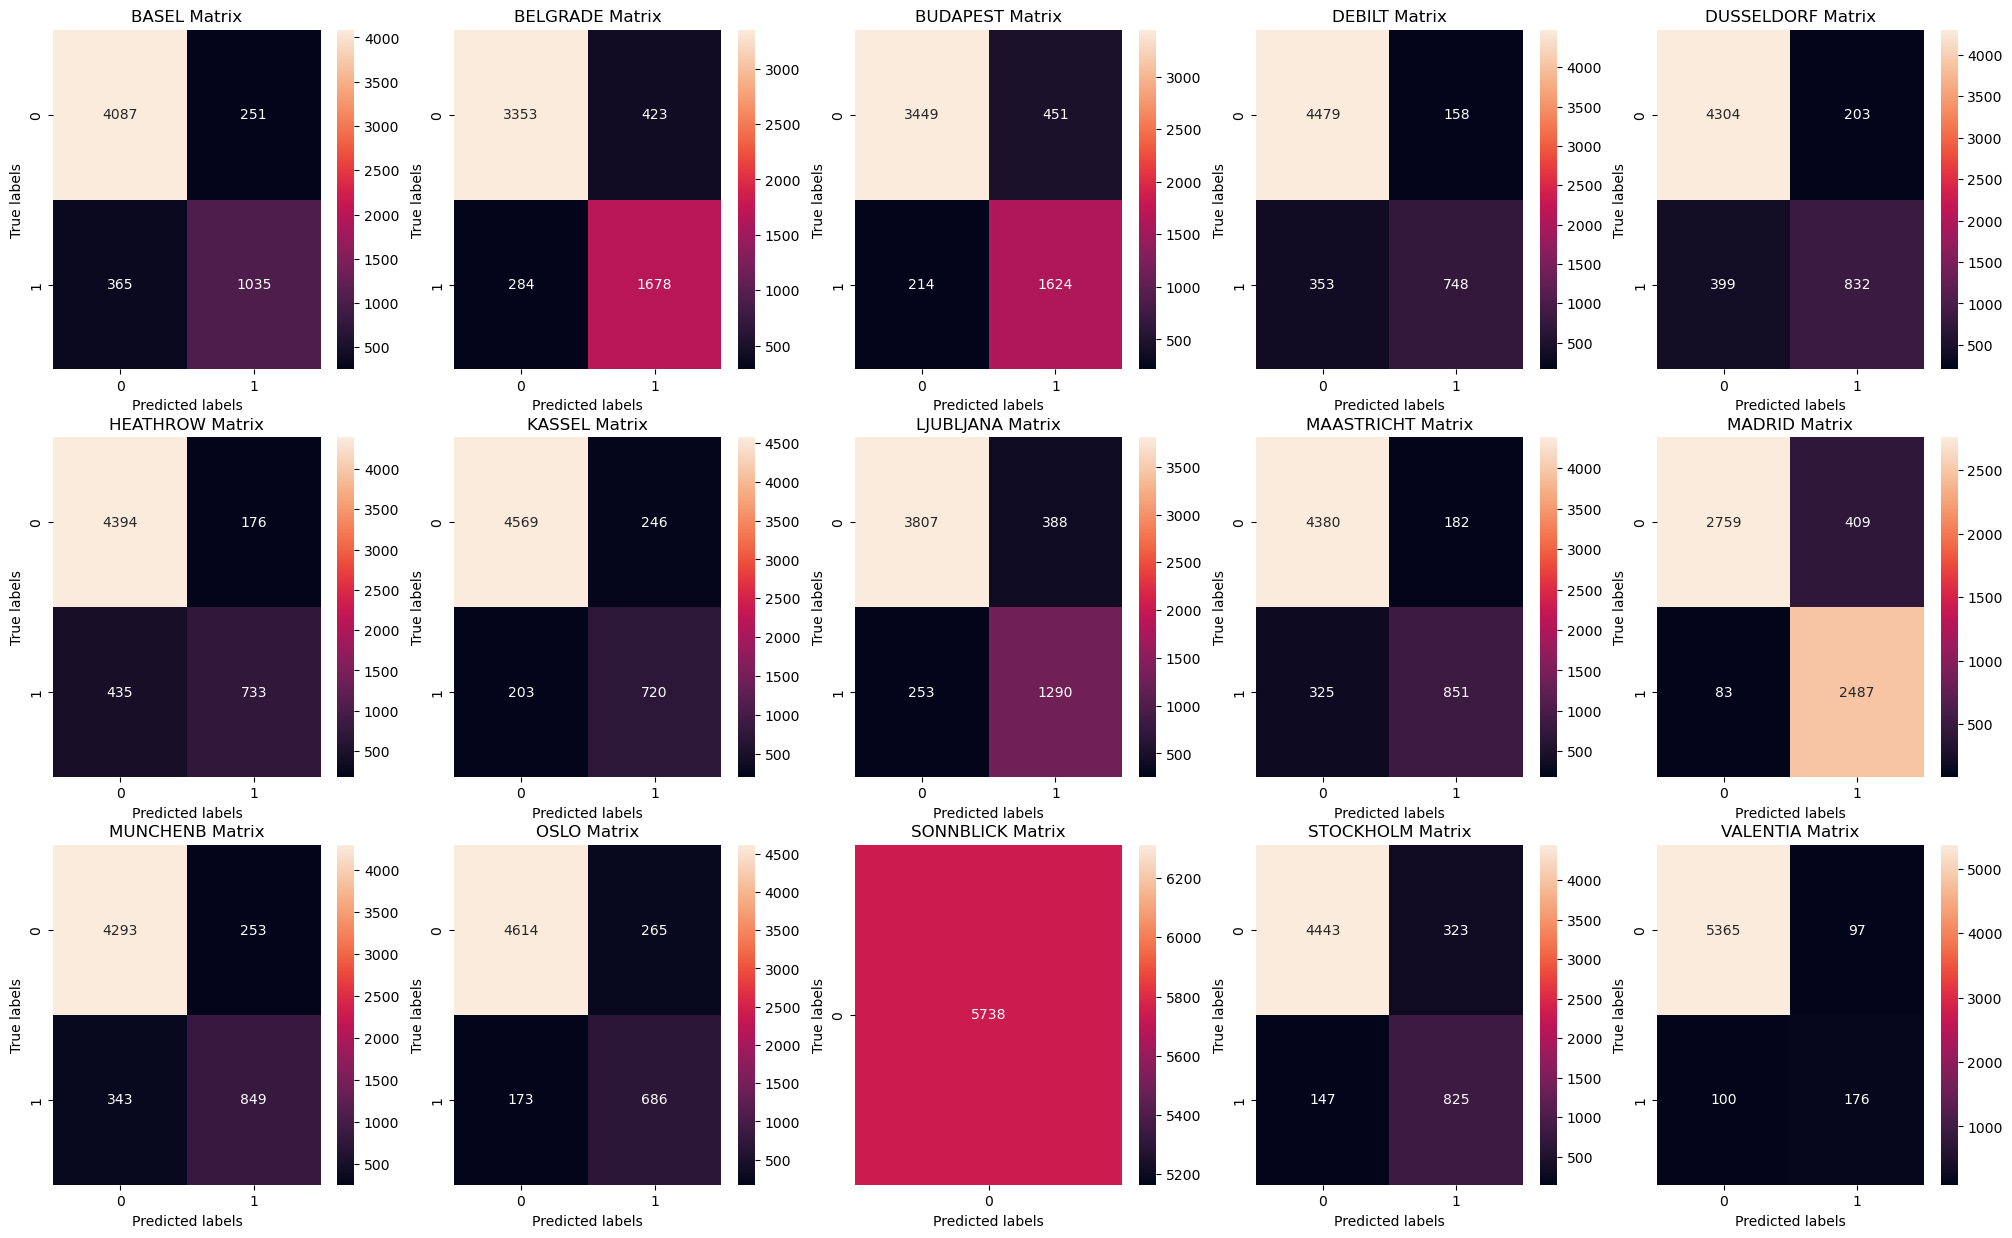

In [27]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1